# Multinomial Logistic Regression

Logistic regression deals with the non-ordered categorical response variable. However, the number of unique values taken by the response variable can only be two. If the number is greater than 2, one of the choices is multinomial logistic regression, often known as Maximum entory model in NLP.

The are two equavilent forms, which are as follows
* One
$$
\begin{equation}
p(Y_i = c) = \frac{e^{\mathbf{\beta}_c\mathbf{X}_i}}
{
1 + \sum_{k}^{K-1}e^{\mathbf{\beta}_k\mathbf{X}_i}
}
\end{equation}
$$
* Two
$$
\begin{equation}
p(Y_i = c) = \frac{e^{\mathbf{\beta}_c\mathbf{X}_i}}
{
\sum_{k}^{K}e^{\mathbf{\beta}_k\mathbf{X}_i}
}
\end{equation}
$$


Particulary, in order to understand the output from the "multinom" function, you have to know the form one, and how it is derived. See "As a set of independent binary regressions" in https://en.wikipedia.org/wiki/Multinomial_logistic_regression.

In [1]:
library(foreign)
library(nnet)
library(ggplot2)
library(reshape2)
library(stargazer)
library(openintro)
library(lattice)
library(caret)
library(MASS)


Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 

Please visit openintro.org for free statistics materials

Attaching package: ‘openintro’

The following object is masked from ‘package:reshape2’:

    tips

The following object is masked from ‘package:ggplot2’:

    diamonds

The following objects are masked from ‘package:datasets’:

    cars, trees


Attaching package: ‘lattice’

The following object is masked from ‘package:openintro’:

    lsegments


Attaching package: ‘caret’

The following object is masked from ‘package:openintro’:

    dotPlot


Attaching package: ‘MASS’

The following objects are masked from ‘package:openintro’:

    housing, mammals



### Example One
Entering high school students make program choices among general program, vocational program and academic program. Their choice might be modeled using their writing score and their social economic status.

The data set contains variables on 200 students. The outcome variable is prog, program type. The predictor variables are 
* social economic status (ses): a three-level categorical variable
* writing score (write): a continuous variable. 

Let’s start with getting some descriptive statistics of the variables of interest.

In [2]:
data(hsb2)

In [3]:
str(hsb2)

'data.frame':	200 obs. of  11 variables:
 $ id     : int  70 121 86 141 172 113 50 11 84 48 ...
 $ gender : chr  "male" "female" "male" "male" ...
 $ race   : chr  "white" "white" "white" "white" ...
 $ ses    : Factor w/ 3 levels "low","middle",..: 1 2 3 3 2 2 2 2 2 2 ...
 $ schtyp : Factor w/ 2 levels "public","private": 1 1 1 1 1 1 1 1 1 1 ...
 $ prog   : Factor w/ 3 levels "general","academic",..: 1 3 1 3 2 2 1 2 1 2 ...
 $ read   : int  57 68 44 63 47 44 50 34 63 57 ...
 $ write  : int  52 59 33 44 52 52 59 46 57 55 ...
 $ math   : int  41 53 54 47 57 51 42 45 54 52 ...
 $ science: int  47 63 58 53 53 63 53 39 58 50 ...
 $ socst  : int  57 61 31 56 61 61 61 36 51 51 ...


The <a href="https://www.rdocumentation.org/packages/openintro/versions/1.7.1/topics/hsb2">hsb2</a> dataset is taken from a national survey of high school seniors.
Two hundred observation were randomly sampled from the High School and Beyond
survey.  Descriptive statistics and exploratory data analysis are shown below.<p>

Here is the list of variables in the file.
<pre>
  obs:           200    highschool and beyond (200 cases)
 vars:            12    28 Feb 2005 09:25
-----------------------------------------------------------------------------
              variable     
variable name   type   about the variable 
-----------------------------------------------------------------------------
id              scale  student id                  
gender        nominal  (male/female)        
race          nominal  ethnicity (hispanic, asian, african-amer, white)        
ses           ordinal  (low, middle, high)           
schtyp        nominal  type of school (public, private)
prog          nominal  type of program (general, academic, vocational)
read            scale  standardized reading score
write           scale  standardized writing score
math            scale  standardized math score
science         scale  standardized science score
socst           scale  standardized social studies score
</pre>



In [4]:
table(hsb2$prog)


   general   academic vocational 
        45        105         50 

In [5]:
table(hsb2$ses, hsb2$prog)

        
         general academic vocational
  low         16       19         12
  middle      20       44         31
  high         9       42          7

In [6]:
with(hsb2, do.call(rbind, tapply(write, ses, function(x) c(M = mean(x), SD = sd(x)))))

,M,SD
low,50.61702,9.490391
middle,51.92632,9.106044
high,55.91379,9.442874


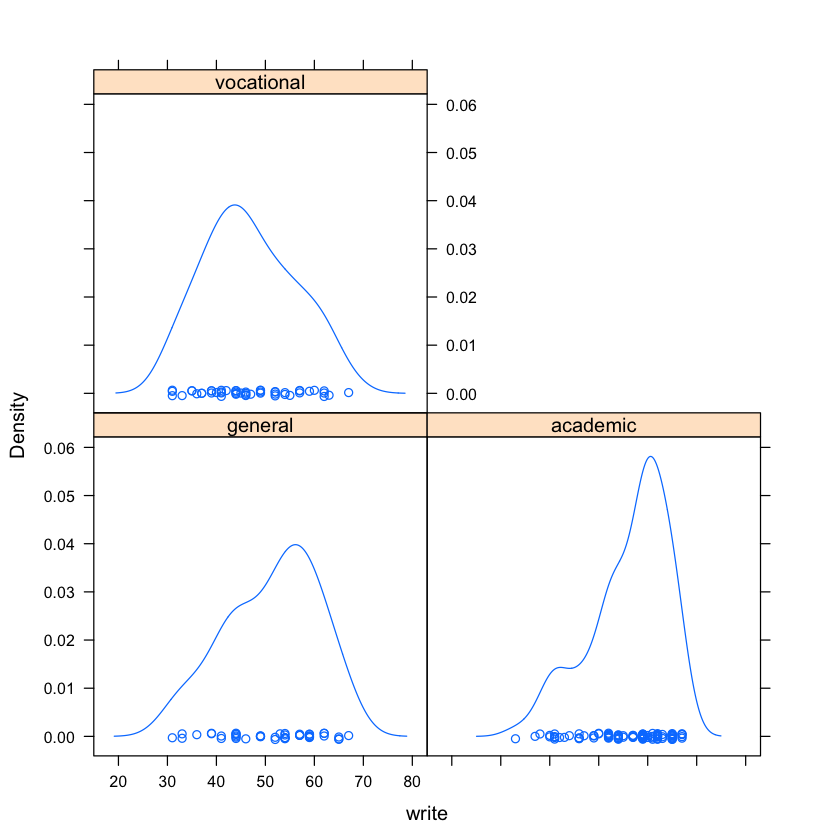

In [7]:
densityplot(~write | prog, hsb2)

In [8]:
hsb2$prog2 <- relevel(hsb2$prog, ref = "academic")

Why one need to set an reference class?

The first formulation derived from 
$$
ln\left(
\frac{p(Y_i = 1)}{p(Y_i = K)}
\right) = \mathbf{\beta_1}\mathbf{X}_i
$$
$$
ln\left(
\frac{p(Y_i = 2)}{p(Y_i = K)}
\right) = \mathbf{\beta_2}\mathbf{X}_i
$$
$$
\vdots
$$
$$
ln\left(
\frac{p(Y_i = K-1)}{p(Y_i = K)}
\right) = \mathbf{\beta_{k-1}}\mathbf{X}_i
$$

In [9]:
multi1 <- multinom(prog2 ~ ses + write, data = hsb2)

# weights:  15 (8 variable)
initial  value 219.722458 
iter  10 value 179.982880
final  value 179.981726 
converged


In [10]:
summary(multi1)

Call:
multinom(formula = prog2 ~ ses + write, data = hsb2)

Coefficients:
           (Intercept)  sesmiddle    seshigh      write
general       2.852198 -0.5332810 -1.1628226 -0.0579287
vocational    5.218260  0.2913859 -0.9826649 -0.1136037

Std. Errors:
           (Intercept) sesmiddle   seshigh      write
general       1.166441 0.4437323 0.5142196 0.02141097
vocational    1.163552 0.4763739 0.5955665 0.02221996

Residual Deviance: 359.9635 
AIC: 375.9635 

In [11]:
z <- summary(multi1)$coefficients/summary(multi1)$standard.errors
z

,(Intercept),sesmiddle,seshigh,write
general,2.445214,-1.2018081,-2.261334,-2.705562
vocational,4.484769,0.6116747,-1.649967,-5.112689


In [12]:
p <- (1 - pnorm(abs(z), 0, 1)) * 2
p

,(Intercept),sesmiddle,seshigh,write
general,0.0144766100,0.2294379,0.02373856,6.818902e-03
vocational,0.0000072993,0.5407530,0.09894976,3.176045e-07




$$
\begin{equation}
    ln\left(\frac{p(prog=general)}{p(prog=academic)}\right) 
    = 2.852198 - \begin{cases}
        0.5332810 & \text{ if ses = middle}\\
        1.1628226 & \text{ if ses = high}\\
        0 & \text{ if ses = low}
    \end{cases} - 0.0579287\times write
\end{equation}
$$
$$
\begin{equation}
    ln\left(\frac{p(prog=vocational)}{p(prog=academic)}\right) 
    = 5.218260 - \begin{cases}
        0.2913859 & \text{ if ses = middle}\\
        0.9826649 & \text{ if ses = high}\\
        0 & \text{ if ses = low}
       \end{cases} - 0.1136037\times write
\end{equation}
$$

A one-unit increase in the variable write is associated with the decrease in the log odds of being in general program vs. academic program in the amount of 0.058


A one-unit increase in the variable write is associated with the decrease in the log odds of being in vocation program vs. academic program. in the amount of 0.1136


The log odds of being in general program vs. in academic program will decrease by 1.163 if moving from ses="low" to ses="high"b12

The log odds of being in general program vs. in academic program will decrease by 0.533 if moving from ses="low"to ses="middle", although this coefficient is not significant.

The log odds of being in vocation program vs. in academic program will decrease by 0.983 if moving from ses="low" to ses="high".

The log odds of being in vocation program vs. in academic program will increase by 0.291 if moving from ses="low" to ses="middle", although this coefficient is not signficant.

In [13]:
pp <- cbind(hsb2[c("ses", "write")], fitted(multi1))
head(pp)

ses,write,academic,general,vocational
low,52,0.4247955,0.3619527,0.2132518
middle,59,0.6110367,0.2036251,0.1853382
high,33,0.2917502,0.2336037,0.4746461
high,44,0.5291960,0.2240505,0.2467534
middle,52,0.4604652,0.2301800,0.3093548
middle,52,0.4604652,0.2301800,0.3093548


In [14]:
pp.melt<-melt(pp, id.vars = c("ses", "write"), value.name = "probability")
pp.melt

ses,write,variable,probability
low,52,academic,0.4247955
middle,59,academic,0.6110367
high,33,academic,0.2917502
high,44,academic,0.5291960
middle,52,academic,0.4604652
middle,52,academic,0.4604652
middle,59,academic,0.6110367
middle,46,academic,0.3293898
middle,57,academic,0.5698425
middle,55,academic,0.5268859


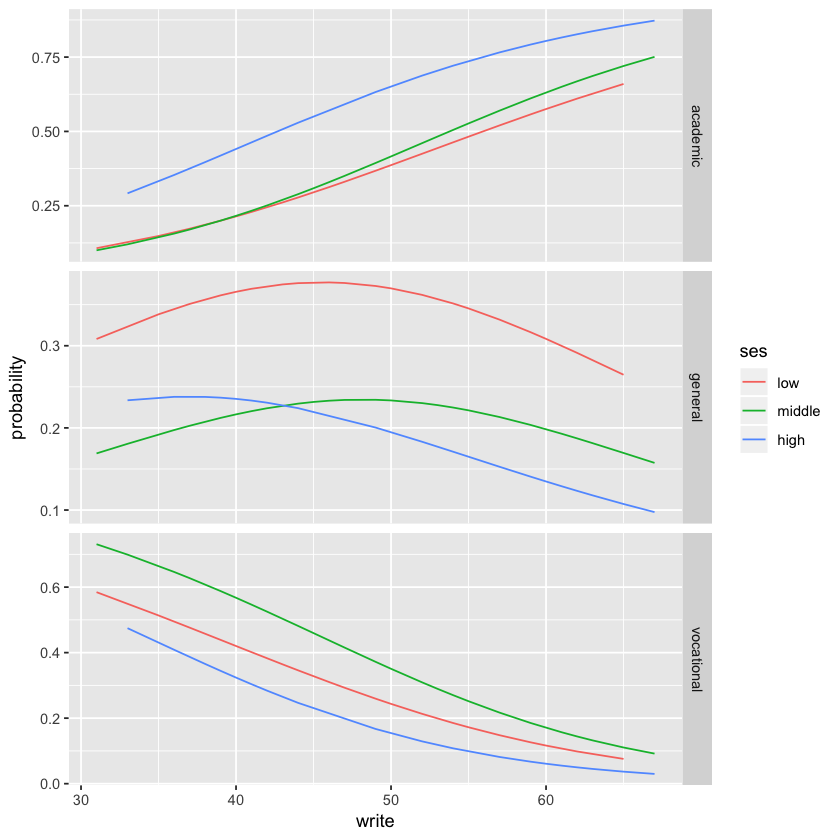

In [15]:
ggplot(pp.melt, aes(x = write, y = probability, colour = ses)) 
    + geom_line() 
    + facet_grid(variable ~., scales = "free")

In [16]:
predicted <- predict(multi1)

In [17]:
table(predicted,hsb2$prog2)

            
predicted    academic general vocational
  academic         92      27         23
  general           4       7          4
  vocational        9      11         23

Now, compute the accuracy of the prediction

In [18]:
mean(as.character(predicted) == as.character(hsb2$prog2))

[1] 0.61

In [19]:
confusionMatrix(predict(multi1), hsb2$prog2)
# table(predict(multi1),hsb2$prog)

Confusion Matrix and Statistics

            Reference
Prediction   academic general vocational
  academic         92      27         23
  general           4       7          4
  vocational        9      11         23

Overall Statistics
                                         
               Accuracy : 0.61           
                 95% CI : (0.5387, 0.678)
    No Information Rate : 0.525          
    P-Value [Acc > NIR] : 0.009485       
                                         
                  Kappa : 0.2993         
 Mcnemar's Test P-Value : 7.654e-06      

Statistics by Class:

                     Class: academic Class: general Class: vocational
Sensitivity                   0.8762         0.1556            0.4600
Specificity                   0.4737         0.9484            0.8667
Pos Pred Value                0.6479         0.4667            0.5349
Neg Pred Value                0.7759         0.7946            0.8280
Prevalence                    0.5250         0.2250 

#### Prediction on the synthetic data

In [20]:
dwrite <- data.frame(ses = rep(c("low", "middle", "high"), each = 41), write = rep(c(30:70),3))
str(dwrite)

'data.frame':	123 obs. of  2 variables:
 $ ses  : Factor w/ 3 levels "high","low","middle": 2 2 2 2 2 2 2 2 2 2 ...
 $ write: int  30 31 32 33 34 35 36 37 38 39 ...


In [21]:
## store the predicted probabilities for each value of ses and write
pp.write <- cbind(dwrite, predict(multi1, newdata = dwrite, type = "probs", se = TRUE))

In [22]:
pp.write

ses,write,academic,general,vocational
low,30,0.09843588,0.2999880,0.6015762
low,31,0.10716868,0.3082195,0.5846118
low,32,0.11650390,0.3162093,0.5672868
low,33,0.12645834,0.3239094,0.5496323
low,34,0.13704576,0.3312711,0.5316831
low,35,0.14827643,0.3382454,0.5134781
low,36,0.16015670,0.3447838,0.4950595
low,37,0.17268854,0.3508384,0.4764731
low,38,0.18586924,0.3563633,0.4577674
low,39,0.19969106,0.3613150,0.4389939


In [23]:
## melt data set to long for ggplot2
lpp <- melt(pp.write, id.vars = c("ses", "write"), value.name = "probability")
head(lpp) # view first few rows

ses,write,variable,probability
low,30,academic,0.09843588
low,31,academic,0.10716868
low,32,academic,0.11650390
low,33,academic,0.12645834
low,34,academic,0.13704576
low,35,academic,0.14827643


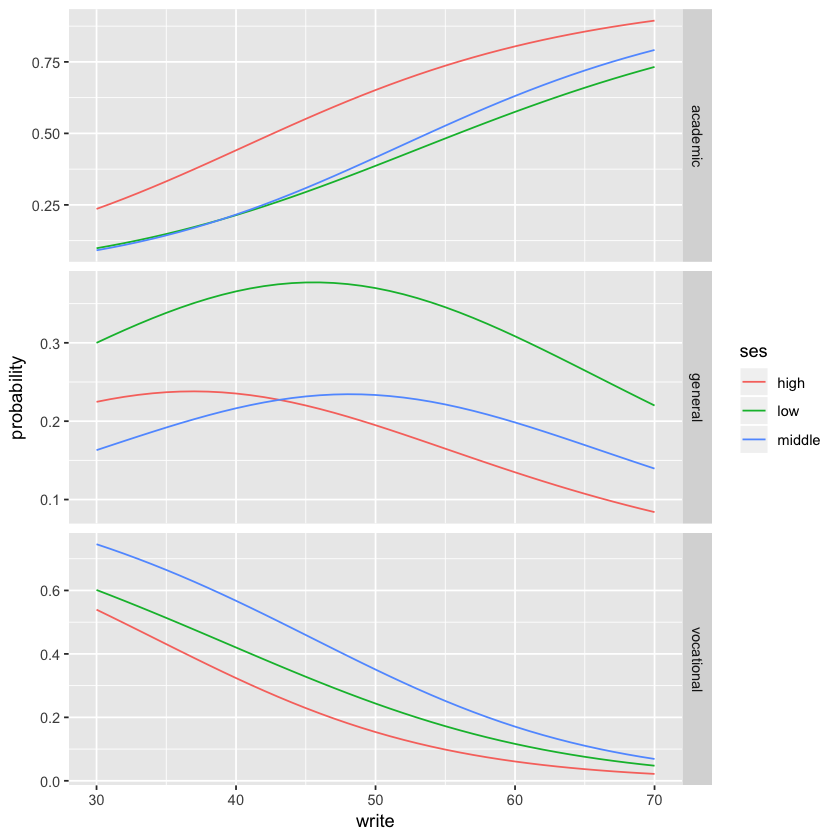

In [24]:
ggplot(lpp, aes(x = write, y = probability, colour = ses)) 
    + geom_line() 
    + facet_grid(variable ~., scales = "free")

### Example 2
We continue to use the same dataset. But we use the following predictors
* science
* socst
* gender

to classify the students based on the social economic status, which has three classes:
* low
* middle
* high

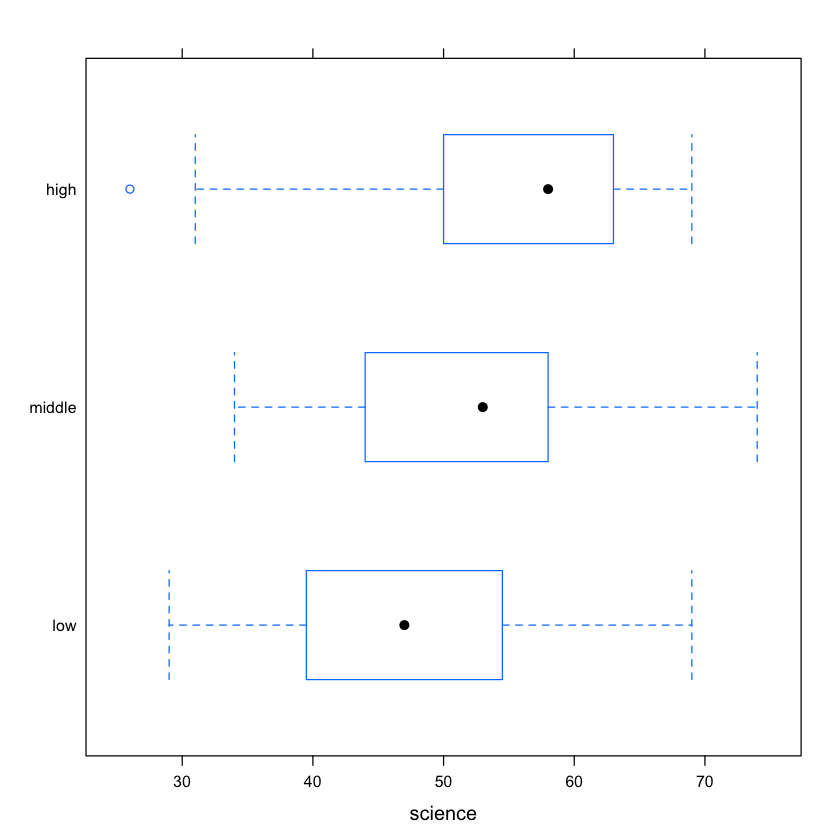

In [25]:
bwplot(ses~science, hsb2)

In [26]:
table(hsb2$ses)


   low middle   high 
    47     95     58 

In [27]:
hsb2$ses2 <- relevel(hsb2$ses, ref = "middle")

In [28]:
multi2 = multinom(ses2 ~ science + socst + gender, data=hsb2)

# weights:  15 (8 variable)
initial  value 219.722458 
iter  10 value 194.040205
final  value 194.034851 
converged


In [29]:
summary(multi2)

Call:
multinom(formula = ses2 ~ science + socst + gender, data = hsb2)

Coefficients:
     (Intercept)     science       socst  gendermale
low     2.728889 -0.02356473 -0.03892451 -0.81661710
high   -4.090167  0.02292187  0.04300344  0.03285623

Std. Errors:
     (Intercept)    science      socst gendermale
low     1.138971 0.02097470 0.01951651  0.3909813
high    1.208847 0.02087183 0.01988935  0.3500151

Residual Deviance: 388.0697 
AIC: 404.0697 

These are the logit coefficients relative to the reference category. For example, under ‘science’, the -0.02 suggests that for one unit increase in ‘science’ score, the logit coefficient for ‘low’ relative to ‘middle’ will go down by that amount, -0.02.

In other words, if your science score increases one unit, your chances of staying in the middle ses category are higher compared to staying in low ses.

In [30]:
stargazer(multi2, type="text", out="multi2.txt")


                      Dependent variable:     
                  ----------------------------
                       low           high     
                       (1)            (2)     
----------------------------------------------
science               -0.024         0.023    
                     (0.021)        (0.021)   
                                              
socst                -0.039**       0.043**   
                     (0.020)        (0.020)   
                                              
gendermale           -0.817**        0.033    
                     (0.391)        (0.350)   
                                              
Constant             2.729**       -4.090***  
                     (1.139)        (1.209)   
                                              
----------------------------------------------
Akaike Inf. Crit.    404.070        404.070   
Note:              *p<0.1; **p<0.05; ***p<0.01


### relative risk ratios

The ratio of the probability of choosing one outcome category over the probability of choosing the baseline category is often referred as relative risk. The relative risk is the right-hand side linear equation exponentiated, leading to the fact that the exponentiated regression coefficients are relative risk ratios for a unit change in the predictor variable

In [31]:
stargazer(multi2, type="text", coef=list(exp(coef(multi2))), p.auto=FALSE, out="multi2.txt")


                      Dependent variable:     
                  ----------------------------
                       low           high     
                       (1)            (2)     
----------------------------------------------
science               0.977          1.023    
                     (0.021)        (0.021)   
                                              
socst                0.962**        1.044**   
                     (0.020)        (0.020)   
                                              
gendermale           0.442**         1.033    
                     (0.391)        (0.350)   
                                              
Constant             15.316**      0.017***   
                     (1.139)        (1.209)   
                                              
----------------------------------------------
Akaike Inf. Crit.    404.070        404.070   
Note:              *p<0.1; **p<0.05; ***p<0.01


* Keeping all other variables constant, if your science score increases one unit, you are 0.97 times more likely to stay in the low ses category as compared to the middle ses category (the risk or odds is 3% lower). The coefficient, however, is not significant.
* Keeping all other variables constant, if your science score increases one unit, you are 1.02 times more likely to stay in the high ses category as compared to the middle ses category (the risk or odds is 2% higher). The coefficient, however, is not significant.

### Oridinal logitic regression


In [32]:
carsdata <- read.csv("http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data", header=F, stringsAsFactors=F)  # import string variables as characters.
colnames(carsdata) <- c("buying", "maint", "doors", "persons", "lug_boot", "safety", "class")

In [33]:
carsdata

buying,maint,doors,persons,lug_boot,safety,class
vhigh,vhigh,2,2,small,low,unacc
vhigh,vhigh,2,2,small,med,unacc
vhigh,vhigh,2,2,small,high,unacc
vhigh,vhigh,2,2,med,low,unacc
vhigh,vhigh,2,2,med,med,unacc
vhigh,vhigh,2,2,med,high,unacc
vhigh,vhigh,2,2,big,low,unacc
vhigh,vhigh,2,2,big,med,unacc
vhigh,vhigh,2,2,big,high,unacc
vhigh,vhigh,2,4,small,low,unacc


In [34]:
str(carsdata)

'data.frame':	1728 obs. of  7 variables:
 $ buying  : chr  "vhigh" "vhigh" "vhigh" "vhigh" ...
 $ maint   : chr  "vhigh" "vhigh" "vhigh" "vhigh" ...
 $ doors   : chr  "2" "2" "2" "2" ...
 $ persons : chr  "2" "2" "2" "2" ...
 $ lug_boot: chr  "small" "small" "small" "med" ...
 $ safety  : chr  "low" "med" "high" "low" ...
 $ class   : chr  "unacc" "unacc" "unacc" "unacc" ...


Task: predict cars evaluation

Reponse variable: evaluation class (very good, good, acceptable or unacceptable)
Predictors:
* buying
* maint
* doors
* persons:
* lug_boot
* safety

whare are their unique values?

In [35]:
sapply(carsdata, unique)

$buying
[1] "vhigh" "high"  "med"   "low"  

$maint
[1] "vhigh" "high"  "med"   "low"  

$doors
[1] "2"     "3"     "4"     "5more"

$persons
[1] "2"    "4"    "more"

$lug_boot
[1] "small" "med"   "big"  

$safety
[1] "low"  "med"  "high"

$class
[1] "unacc" "acc"   "vgood" "good"

In [36]:
lapply(carsdata[, c("class", "buying", "maint", "lug_boot")], table)

$class

  acc  good unacc vgood 
  384    69  1210    65 

$buying

 high   low   med vhigh 
  432   432   432   432 

$maint

 high   low   med vhigh 
  432   432   432   432 

$lug_boot

  big   med small 
  576   576   576 


In [37]:
#Reorder the levels of factors
carsdata$buying <- factor(carsdata$buying, levels=c("low", "med", "high", "vhigh"), ordered=TRUE)
carsdata$maint <- factor(carsdata$maint, levels=c("low", "med", "high", "vhigh"), ordered=TRUE)
carsdata$doors <- factor(carsdata$doors, levels=c("2", "3", "4", "5more"), ordered=TRUE)
carsdata$persons <- factor(carsdata$persons, levels=c("2", "4", "more"), ordered=TRUE)
carsdata$lug_boot <- factor(carsdata$lug_boot, levels=c("small", "med", "big"), ordered=TRUE)
carsdata$safety <- factor(carsdata$safety, levels=c("low", "med", "high"), ordered=TRUE)
carsdata$class <- factor(carsdata$class, levels=c("unacc", "acc", "good", "vgood"), ordered=TRUE)

In [38]:
# Prepare Training and Test Data
set.seed(100)
trainingRows <- sample(1:nrow(carsdata), 0.7 * nrow(carsdata))
trainingData <- carsdata[trainingRows, ]
testData <- carsdata[-trainingRows, ]

In [39]:
### Build ordered logistic regression model
options(contrasts = c("contr.treatment", "contr.poly"))
polrMod <- polr(class ~ safety + lug_boot + doors + buying + maint, data=trainingData, Hess=TRUE)
summary(polrMod)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Call:
polr(formula = class ~ safety + lug_boot + doors + buying + maint, 
    data = trainingData, Hess = TRUE)

Coefficients:
              Value Std. Error   t value
safety.L    19.9443    0.06145  324.5415
safety.Q   -10.6548    0.10088 -105.6191
lug_boot.L   1.0119    0.14011    7.2224
lug_boot.Q  -0.3197    0.13355   -2.3940
doors.L      0.5415    0.15573    3.4774
doors.Q     -0.2787    0.15466   -1.8018
doors.C     -0.1096    0.15372   -0.7132
buying.L    -2.0945    0.18137  -11.5480
buying.Q    -0.1369    0.15659   -0.8746
buying.C     0.5219    0.15318    3.4069
maint.L     -1.8209    0.17533  -10.3856
maint.Q     -0.4768    0.15811   -3.0153
maint.C      0.3319    0.15518    2.1388

Intercepts:
           Value     Std. Error t value  
unacc|acc     9.4557    0.0740   127.8298
acc|good     11.8726    0.1345    88.2884
good|vgood   13.1331    0.1997    65.7533

Residual Deviance: 1300.15 
AIC: 1332.15 

In [40]:
predictedClass <- predict(polrMod, testData)  # predict the classes directly
head(predictedClass)

[1] unacc unacc unacc unacc unacc unacc
Levels: unacc acc good vgood

In [41]:
predictedScores <- predict(polrMod, testData, type="p")  # predict the probabilites
head(predictedScores)

,unacc,acc,good,vgood
3,0.9774549,2.049194e-02,1.470224e-03,5.829671e-04
6,0.9347665,5.904708e-02,4.424660e-03,1.761744e-03
12,0.9774549,2.049194e-02,1.470224e-03,5.829671e-04
13,1.0000000,3.574918e-14,2.664535e-15,8.881784e-16
14,0.9762376,2.159594e-02,1.551314e-03,6.151902e-04
18,0.9120030,7.946377e-02,6.099087e-03,2.434191e-03


In [42]:
table(testData$class)


unacc   acc  good vgood 
  354   120    17    28 

In [43]:
table(testData$class, predictedClass)

       predictedClass
        unacc acc good vgood
  unacc   305  45    0     4
  acc      60  60    0     0
  good      0  17    0     0
  vgood     0  18    0    10

In [44]:
#Missclassification Error
mean(as.character(testData$class) != as.character(predictedClass)) 

[1] 0.2774566

The materials in this jupyter notebook are based on the materials from 

https://rpubs.com/rslbliss/r_logistic_ws

http://scg.sdsu.edu/linear-regression-in-r-abalone-dataset/

https://www.datacamp.com/community/tutorials/logistic-regression-R

http://r-statistics.co/Multinomial-Regression-With-R.html

http://r-statistics.co/Logistic-Regression-With-R.html

http://data.princeton.edu/R/glms.html

https://stats.idre.ucla.edu/r/dae/logit-regression/

https://stats.idre.ucla.edu/r/dae/multinomial-logistic-regression/

http://uc-r.github.io/logistic_regression

https://analyticsdefined.com/softmax-regression-in-r/

https://stats.idre.ucla.edu/r/modules/exploring-data-with-graphics/

http://r-statistics.co/Ordinal-Logistic-Regression-With-R.html

https://stats.idre.ucla.edu/r/dae/ordinal-logistic-regression/



On generalized linear models: https://www.statmethods.net/advstats/glm.html